In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df_train = pd.read_csv('E:/Kaggle/Titanic/titanic_data/train.csv')
df_test = pd.read_csv('E:/Kaggle/Titanic/titanic_data/test.csv')

In [3]:
len(df_train)

891

In [4]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
print('-' * 40)
df_train.info()

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
len(df_test)

418

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# Draw the picture of the percentage of survivals
survival_num = df_train['Survived'].value_counts()
survival_num

0    549
1    342
Name: Survived, dtype: int64

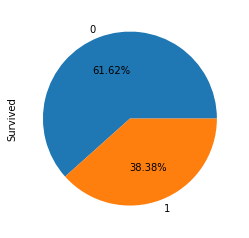

In [10]:
survival_num.plot.pie(autopct = '%1.2f%%')

In [11]:
df_train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [12]:
df_train.groupby(['Survived', 'Sex'])['Sex'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64

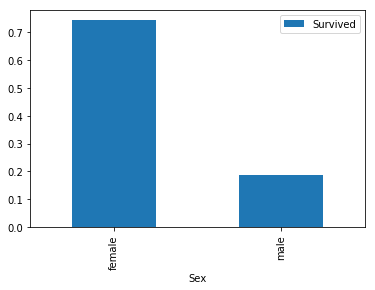

In [13]:
df_train.groupby('Sex').agg({'Survived': np.mean}).plot.bar()
# We can see the unbalance of survival rate between male and female

In [14]:
# Judge the correlation of Pclass and Survived
df_train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [15]:
df_train.groupby(['Pclass']).agg({'Survived': np.mean})

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


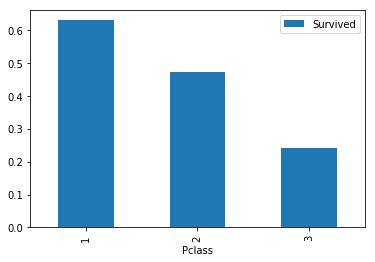

In [16]:
df_train.groupby(['Pclass']).agg({'Survived': np.mean}).plot.bar()

In [17]:
df_train.groupby(['Pclass', 'Sex', 'Survived'])['Survived'].count()

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

In [18]:
df_train.groupby(['Pclass','Sex']).agg({'Survived': np.mean})

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

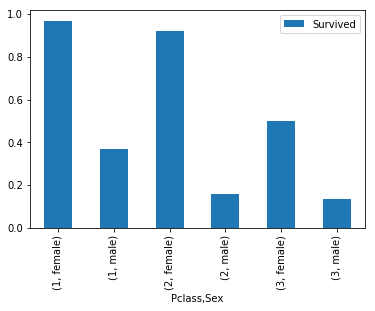

In [19]:
df_train.groupby(['Pclass','Sex']).agg({'Survived': np.mean}).plot.bar()

C:\Users\naive\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


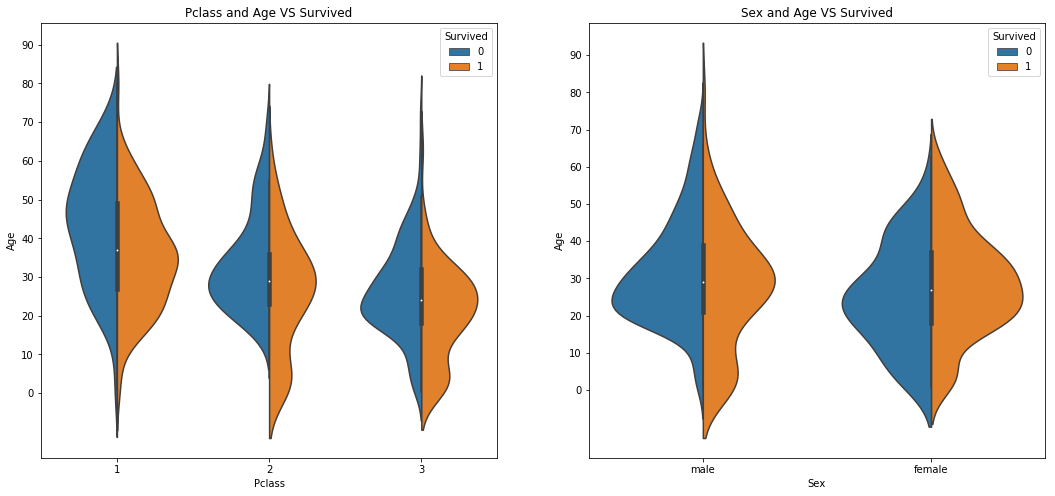

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = df_train, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0, 100, 10))

sns.violinplot('Sex','Age', hue = 'Survived', data = df_train, split=True, ax = ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0, 100, 10))
 
plt.show()


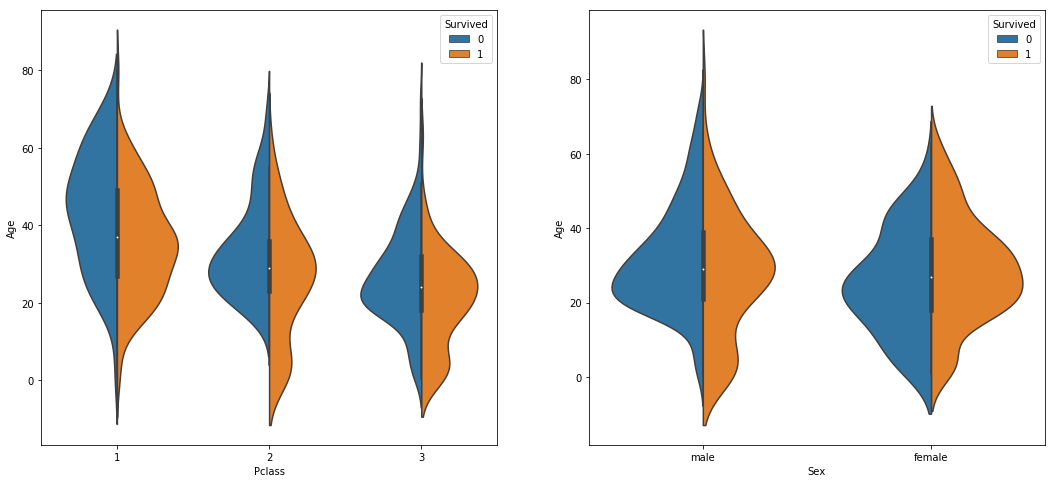

In [21]:
plt.figure(figsize = (18, 8))
plt.subplot(121)
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = df_train, split=True)

plt.subplot(122)
sns.violinplot('Sex', 'Age', hue = 'Survived', data = df_train, split=True)

plt.show()

<Figure size 1296x576 with 0 Axes>

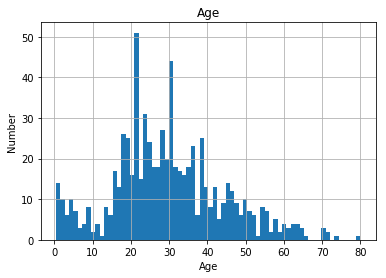

In [22]:
plt.figure(figsize = (18, 8))
df_train.hist(column='Age',bins = 70)
plt.xlabel('Age')
plt.ylabel('Number')
plt.show()

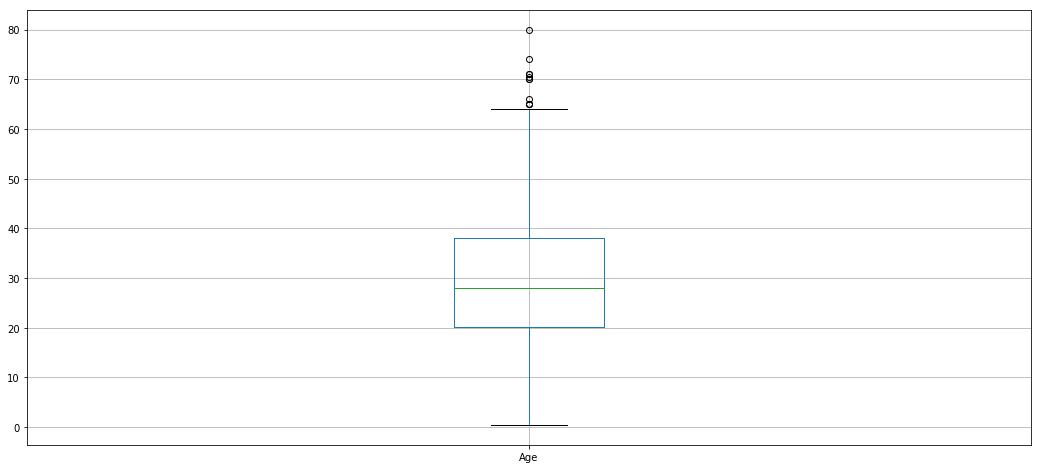

In [23]:
plt.figure(figsize=(18,8))
df_train.boxplot(column='Age')#, showfliers = False)
plt.show()

C:\Users\naive\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


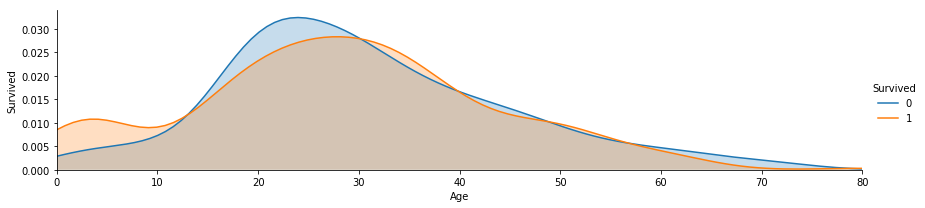

In [24]:
facet = sns.FacetGrid(df_train, hue = 'Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, df_train['Age'].max()))
plt.xlabel('Age')
plt.ylabel('Survived')
facet.add_legend()
plt.show()

In [25]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [26]:
bins = [0, 12, 18, 45, 60, 80]
df_train['age_group'] = pd.cut(df_train['Age'], bins)
df_train['age_group'].value_counts()

(18, 45]    472
(45, 60]     81
(12, 18]     70
(0, 12]      69
(60, 80]     22
Name: age_group, dtype: int64

In [27]:
df_train.groupby('age_group').agg({'Survived': np.mean})

,Survived
age_group,
"(0, 12]",0.579710
"(12, 18]",0.428571
"(18, 45]",0.385593
"(45, 60]",0.407407
"(60, 80]",0.227273


In [28]:
df_train['Name'].str

In [29]:
df_train['title'] = df_train['Name'].str.extract('([A-Za-z]+)\.')

In [30]:
df_train.groupby(['title', 'Survived'])['Survived'].count()

title     Survived
Capt      0             1
Col       0             1
          1             1
Countess  1             1
Don       0             1
Dr        0             4
          1             3
Jonkheer  0             1
Lady      1             1
Major     0             1
          1             1
Master    0            17
          1            23
Miss      0            55
          1           127
Mlle      1             2
Mme       1             1
Mr        0           436
          1            81
Mrs       0            26
          1            99
Ms        1             1
Rev       0             6
Sir       1             1
Name: Survived, dtype: int64

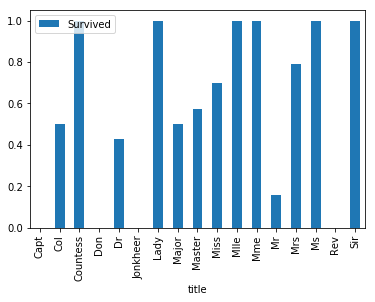

In [31]:
df_train.groupby('title').agg({'Survived': np.mean}).plot.bar()

In [32]:
df_train['name_length'] = df_train['Name'].apply(len)

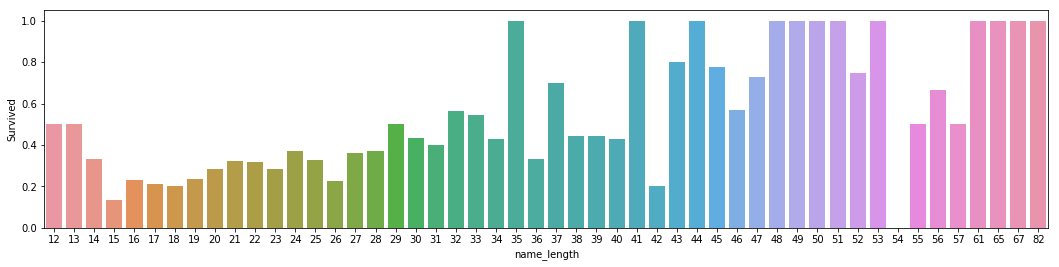

In [33]:
fig, ax = plt.subplots(1, 1, figsize = (18,4))
n = df_train.groupby('name_length', as_index =False).agg({'Survived': np.mean})
#n = df_train[['name_length', 'Survived']].groupby('name_length', as_index = False).mean()
sns.barplot(x = 'name_length', y= 'Survived', data = n)

In [34]:
sib = df_train[df_train['SibSp'] != 0]
nosib = df_train[df_train['SibSp'] == 0 ]

Text(0.5, 1.0, 'Nosib')

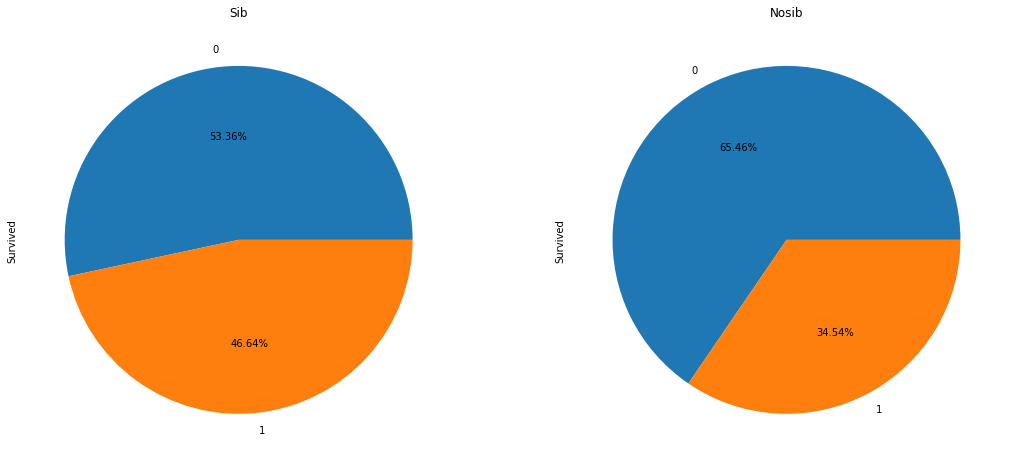

In [35]:
#plt.figure(figsize=(18,8))
fig, ax = plt.subplots(1, 2, figsize = (18,8))
ax[0] = sib['Survived'].value_counts().plot.pie(autopct = '%1.2f%%',ax = ax[0])
ax[0].set_title('Sib')

ax[1] = nosib['Survived'].value_counts().plot.pie(autopct = '%1.2f%%',ax = ax[1])
ax[1].set_title('Nosib')

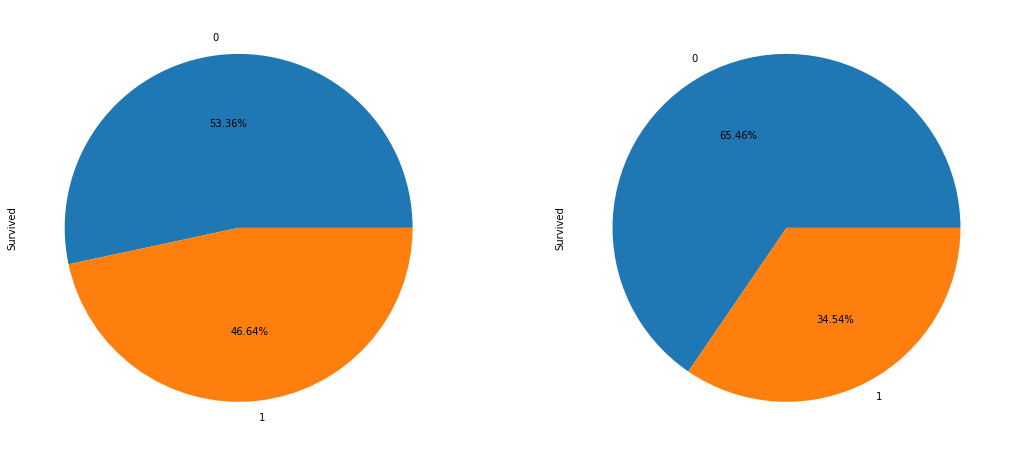

In [36]:
plt.figure(figsize = (18, 8))

plt.subplot(121)
sib['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.set_title = 'Sib'

plt.subplot(122)
#plt.figure(figsize = (13, 8))
nosib['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.set_title = 'Nosib'
plt.show()

In [37]:
parch = df_train[df_train['Parch'] != 0]
noparch = df_train[df_train['Parch'] == 0]

In [38]:
parch['Survived'].value_counts()

1    109
0    104
Name: Survived, dtype: int64

Text(0.5, 0, 'NoParch')

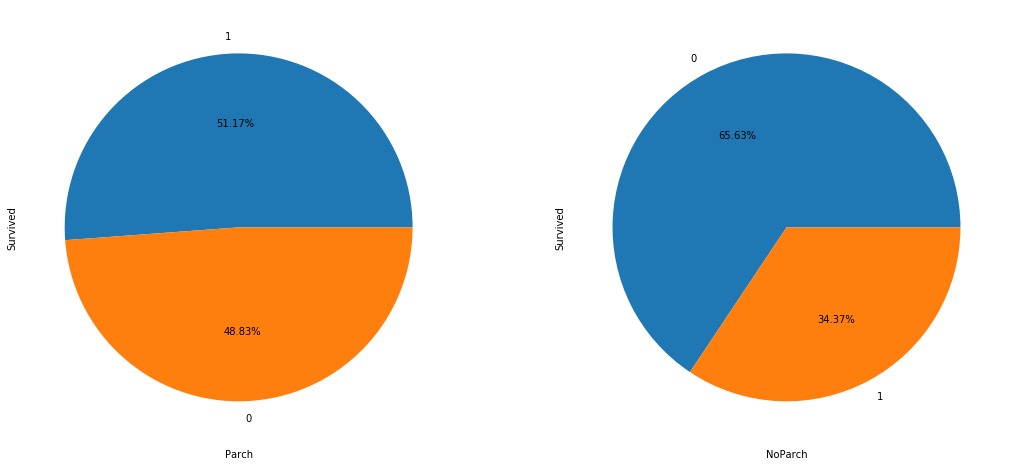

In [39]:
plt.figure(figsize = (18,8))
plt.subplot(121)
parch['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.xlabel('Parch')

plt.subplot(122)
noparch['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.xlabel('NoParch')

Text(0.5, 1.0, 'Sib')

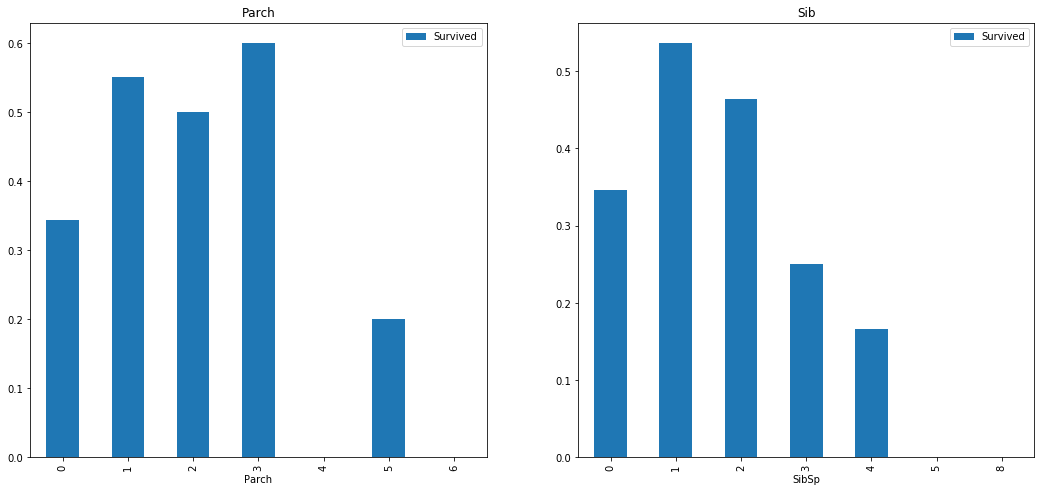

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (18,8))
df_train.groupby('Parch').agg({'Survived': np.mean}).plot.bar(ax = ax[0])
ax[0].set_title('Parch')

df_train.groupby('SibSp').agg({'Survived': np.mean}).plot.bar(ax = ax[1])
ax[1].set_title('Sib')

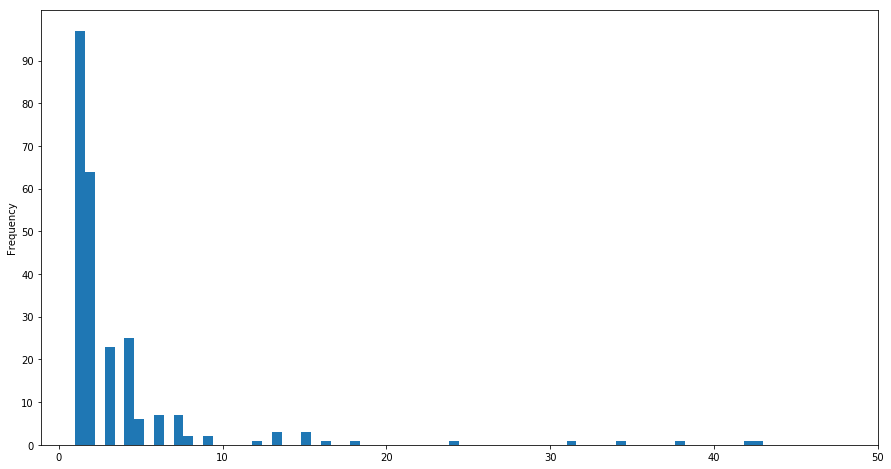

In [41]:
plt.figure(figsize=(15, 8))
df_train['Fare'].value_counts().plot.hist(bins = 70)
plt.xticks(range(0,60,10))
plt.yticks(range(0,100,10))

plt.show()

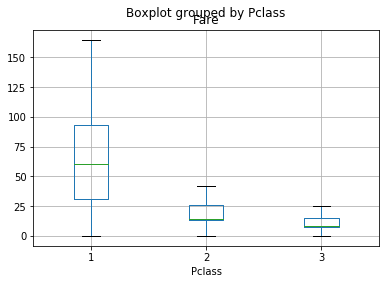

In [42]:
df_train.boxplot(column = 'Fare', by = 'Pclass', showfliers = False)

In [43]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

C:\Users\naive\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


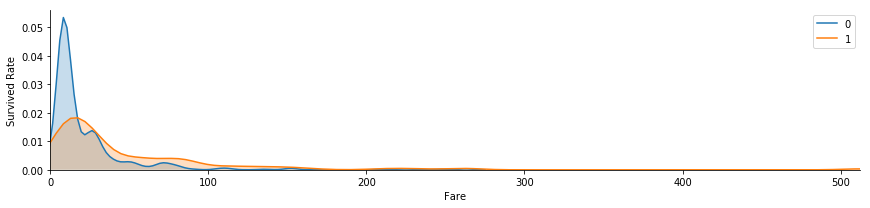

In [44]:
facet2 = sns.FacetGrid(df_train, hue = 'Survived', aspect = 4)
facet2.map(sns.kdeplot, 'Fare', shade = True)
facet2.set(xlim=(0, df_train['Fare'].max()))
plt.xlabel('Fare')
plt.ylabel('Survived Rate')
plt.legend()
plt.show()

In [45]:
fare_survived = df_train['Fare'][df_train['Survived'] == 1]
fare_not_survived = df_train['Fare'][df_train['Survived'] != 1]

In [46]:
average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])

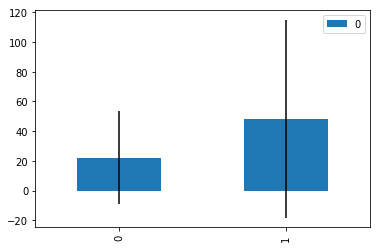

In [47]:
average_fare.plot(yerr = std_fare, kind = 'bar')

Text(0.5, 1.0, 'Embarked and Survived')

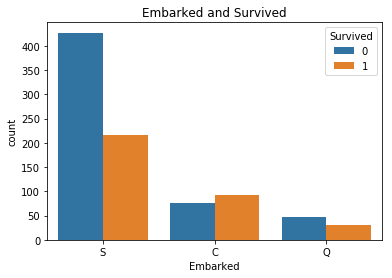

In [48]:
sns.countplot('Embarked', hue = 'Survived', data=df_train)
plt.title('Embarked and Survived')

C:\Users\naive\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\naive\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


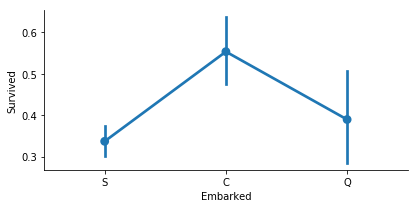

In [49]:
sns.factorplot('Embarked', 'Survived', data = df_train, size=3, aspect = 2)

In [50]:
df_train['total_family'] = df_train['SibSp'] + df_train['Parch']

Text(0.5, 1.0, 'Family_Member VS Survived_Rate')

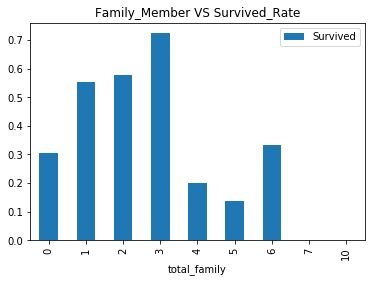

In [51]:
df_train.groupby('total_family').agg({'Survived': np.mean}).plot.bar()
plt.title('Family_Member VS Survived_Rate')

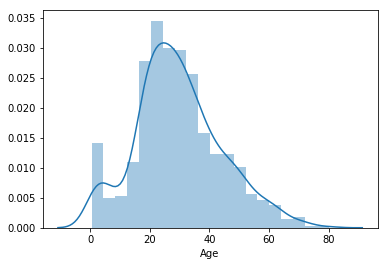

In [54]:
sns.distplot(df_train['Age'][df_train['Age'].notnull()], label = 'skewness: %.2f'%(df_train['Age'][df_train['Age'].notnull()].skew()))

In [73]:
bins = [0, 12, 18, 30,45, 60, 80]

In [74]:
orig_age = pd.cut(df_train['Age'][df_train['Age'].notnull()], bins)

([<matplotlib.axis.YTick at 0x212eba8f7f0>,
 <a list of 6 Text yticklabel objects>)

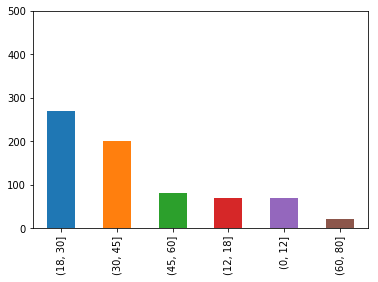

In [79]:
orig_age.value_counts().plot.bar()
plt.yticks(range(0,600,100))

In [55]:
full = pd.read_csv('full_data2.csv')

In [76]:
full_age = pd.cut(full['Age'], bins)

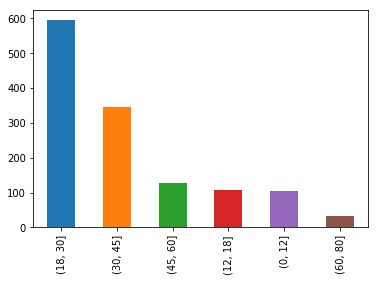

In [77]:
full_age.value_counts().plot.bar()

C:\Users\naive\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


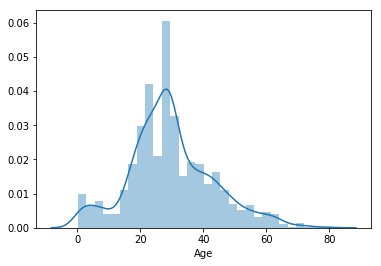

In [56]:
sns.distplot(full['Age'], label = 'skewness: %.2f'%(full['Age'].skew()))